# SKlearn - neural networks

Import the digits data set and train a multilayer perceptron (MLP). The digits dataset, which is a simplified version of the very famous MNIST data set. This is a set of images, in black and white, of hand-drawn numbers from 0 to 9. Before proceeding, we will look at some of the data.

As before, we will be using the sklearn library, which is adequate for small multilayer perceptrons. SKlearn is not intended to be a deep-learning library, and does not support parallelisation via GPUs. This means it is fine for our small examples (<1000 rows, <50 features, 2-3 hidden layers), but becomes very slow for anything larger.

In [1]:
# import a dataset -  we will use one of the scikit built in datasets again
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
digits = datasets.load_digits()

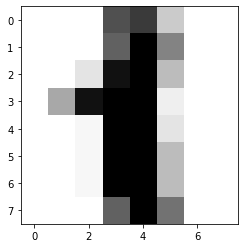

In [2]:
# get one image
image1 = digits.images[1]
plt.imshow(image1, cmap='Greys')

We should understand what the cmap parameter is doing here. The data in *images* is stored as a 2-d array, so that the rows and columns of the array match up with the physical coordinates of the image. The data in *data* is stored as a 1-d array, as shown below. We should compare both arrays to ensure how the image data has been converted. From here, we will be working with data, as the sklearn functions take a 1-D array as input.

Note that this means, for the simple MLP we will be training here, it does not matter which order the image pixels are placed in the input vector. That's not the case for a CNN where the convolution layer is applied to grids of nearby pixels. Randomly shuffling the pixels in the image prior to training a CNN would harm performance. 

In [3]:
print(digits.images[1])
print(digits.data[1])

[[ 0.  0.  0. 12. 13.  5.  0.  0.]
 [ 0.  0.  0. 11. 16.  9.  0.  0.]
 [ 0.  0.  3. 15. 16.  6.  0.  0.]
 [ 0.  7. 15. 16. 16.  2.  0.  0.]
 [ 0.  0.  1. 16. 16.  3.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  1. 16. 16.  6.  0.  0.]
 [ 0.  0.  0. 11. 16. 10.  0.  0.]]
[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


Now let us train the MLP. As part of good practice, we scale the digits data. The effect of this is to ensure that any resulting gradients are of a similar scale. This will make the gradient descent process more likely to converge quickly.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

X_scaled = preprocessing.scale(digits.data)

# split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, digits.target, test_size = 0.5)
clf = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(20, 20), random_state=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/opt/conda/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [5]:
clf.score(X_test, y_test)

0.9021134593993326

Note that the above score is providing the accuracy - think about whether this is a good metric for this classifier. Using the code above as a template, experiment with changing some of the free parameters.

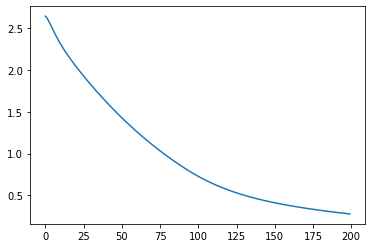

In [6]:
loss = clf.loss_curve_
plt.plot(loss)